In [892]:
import numpy as np
from Library_term_project import *


In [893]:
# Equation for temperature distribution
#T(z,t)=T_surface+A*sin(2*np.pi*t/To)
A=5
T_surface=20
To=24*3600
z=10

# C_w=4174000
# C_s=2104000
C_s=1739
C_w=4180
rho_w=1000
rho_s=2650
lamb=2
qf=4*10**(-7)
rho=rho_s


a1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5-(qf*C_w*rho_w/(2*lamb))
b1=(((((np.pi*C_s*rho)/(lamb*To))**2)+1/4*(qf*C_w*rho_w/(2*lamb))**4)**0.5+1/2*((qf*C_w*rho_w/(2*lamb))**2))**0.5



In [894]:
def g(x):
 return 20 
def a(t):
    return A*np.sin(2*np.pi*t/24)+20
def b(t):
    return 20

#60,15000
x_i = 0     
x_f = 10
nx = 70
t_i = 0    
t_f = 6
nt = 25000
hx = (x_f - x_i)/nx # Spatial step size
ht = (t_f - t_i)/nt # Time step size

print(ht/hx**2)
#adjust parameters nx and nt
# nx=100
# nt=1000

0.011760000000000001


In [895]:
#Analytical solution

def T(x,t):
    return (A*np.exp(-a1*x)*np.sin(-b1*x+(2*np.pi*t/To)))+20

def T_0(x,t):
    return T_surface+A*np.sin(2*np.pi*t/To)

# zlist=[]

# for i in range(nx+1):
#     zlist.append(i*hx)

z=10

zlist=np.linspace(0,10,1000)

import matplotlib.pyplot as plt
# plt.figure(figsize=(6,9))
# for i in tlist:
#     Tlist=[T(z,i*60) for z in zlist]
#     plt.plot(Tlist,zlist,label='t='+str(i)+' hour')



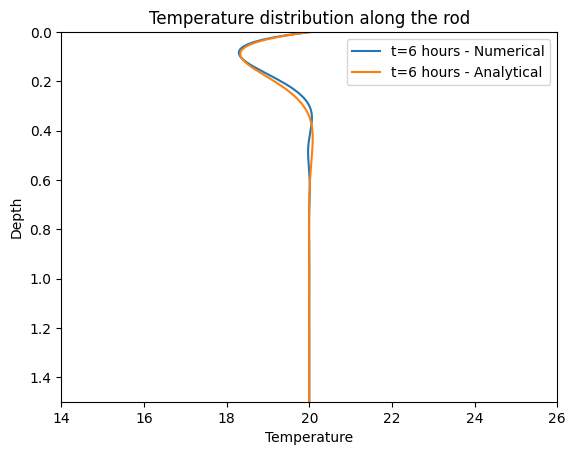

In [896]:
# import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# for i in range(0,7):
#         if i==4:
#                 xlist,ulist,tlist = crank_nicolson(g,a,b,x_i,x_f,t_i,t_f,nx,nt,i)
#                 plt.plot(ulist,xlist,label='t = '+str(i)+'hrs - Simulated')
# plot a smooth curve





xlist,ulist,tlist = crank_nicolson(g,a,b,x_i,x_f,t_i,t_f,nx,nt,6)
xnew = np.linspace(x_i, x_f, 1000)
spl = make_interp_spline(xlist, ulist, k=5)  
power_smooth = spl(xnew)
plt.plot(power_smooth,xnew,label='t='+str(6)+' hours - Numerical')



tlist = [6]
for i in tlist:
    Tlist=[T(z,i) for z in zlist]
    plt.plot(Tlist,zlist,label='t='+str(i)+' hours - Analytical')



ax=plt.gca()
ax.invert_yaxis()
plt.title('Temperature distribution along the rod')
plt.xlabel('Temperature')
plt.ylabel('Depth')
plt.legend()
plt.xlim(14,26)
plt.ylim(1.5,0)
plt.show()
